# Background
Supermarkets compete to increase customer satisfaction and retain loyalty through personalized services and targeted marketing strategies. By analyzing customer purchasing data and responses to promotions, the company can gain insight into customer behavior patterns. This analysis aims to uncover key trends that will assist in designing more effective marketing strategies and improving customer experience.

## Problem Statement
**Main Question:** What is the biggest factor influencing customer spending in supermarkets, and how can the company enhance customer loyalty through more effective marketing strategies?

**Sub-Question:**
- Are there spending patterns based on demographics, such as age, marital status, or number of children?
- What is the average spending of customers on specific product categories (meat, wine, fish, etc.)?
- Are customers who receive regular marketing campaigns more likely to make a purchase?

# Import Libraries and Load Dataset
To answer the questions above, the dataset can be accessed [here](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

The dataset contains information related to demographics, products, promotions, and the places where buyers make purchases. There are 29 columns in the Supermarket Customers dataset, namely:

- ID:Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last mont


Here are the top 5 and bottom 5 rows from the Supermarket Customers dataset.

In [20]:
file_path = 'C:\\Users\\User\\OneDrive\\Documents\\Python Scripts\\Supermarket Customers.csv'
df = pd.read_csv(file_path)
# Display the top 5 lines.
print("5 baris teratas:")
print(df.head(5))

# Display the last 5 lines
print("\n5 baris terbawah:")
print(df.tail(5))

5 baris teratas:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  

## Understanding Data Structure
This step aims to get an initial understanding of the data structure, including data types, column count, and row count. Understanding the structure helps us identify columns that may need data cleaning or data type conversion.

In [32]:
print(f'The number of rows and columns in the dataset df is: {df.shape}')
df.info()

# Descriptive statistics for numerical columns
data.describe()

# Descriptive statistics for categorical columns
data.describe(include='object')

The number of rows and columns in the dataset df is: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         224

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


# Detecting and Analyzing Missing Values

Columns with missing values:
 Income    24
dtype: int64


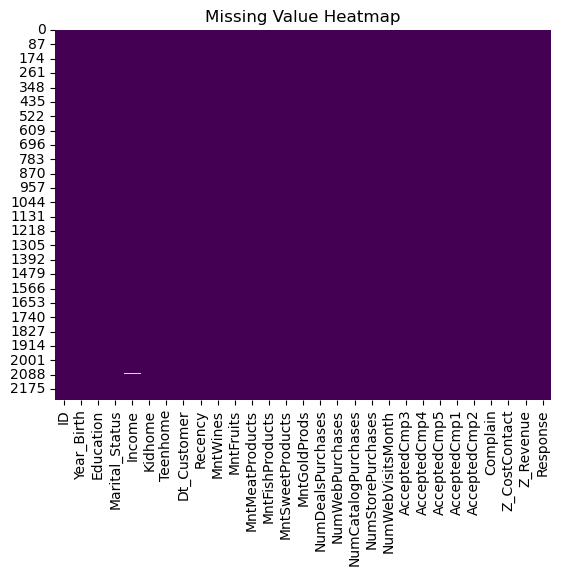

In [33]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

# Handling Missing Values Based on Related Columns

We will handle missing values using domain knowledge and related statistics based on relevant columns.


In [34]:
# Fill 'Income' based on the median income within each 'Education' and 'Marital_Status' group
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))

# Check for remaining missing values
missing_values = data.isnull().sum()
print("Remaining missing values after domain-based filling:\n", missing_values[missing_values > 0])

# Fill remaining missing values with median for numerical columns and mode for categorical columns
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].median(), inplace=True)

# Confirm no more missing values
print("Final missing values:\n", data.isnull().sum().sum())


Remaining missing values after domain-based filling:
 Series([], dtype: int64)
Final missing values:
 0


# Outlier Control

After handling missing values, the next step is identifying and managing outliers. Outliers can influence the analysis results, especially in spending and income columns.

## Identifying Outliers Using Boxplot

Boxplots are utilized because they provide a clear visualization of the distribution of data, highlighting outliers effectively. The box represents the interquartile range (IQR), and points outside the "whiskers" are considered outliers.

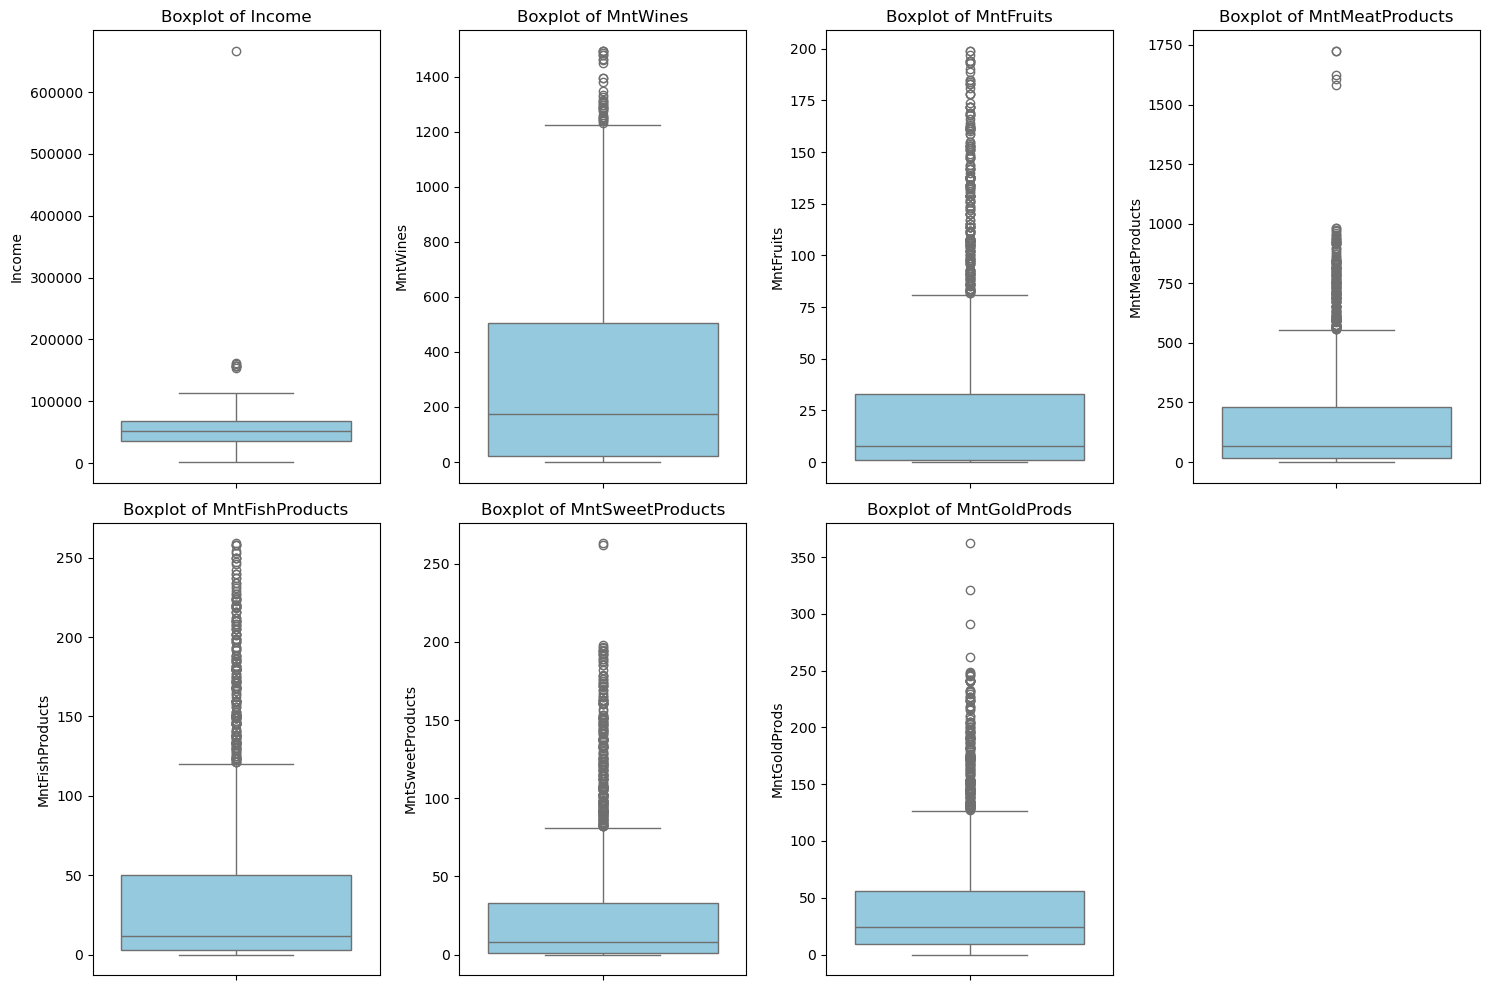

In [35]:
# Columns to check for outliers, especially spending and income columns
columns_to_check = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create boxplot for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


## Determining Outlier Boundaries with IQR (Interquartile Range)

The IQR method is a standard statistical approach for outlier detection. By calculating the first (Q1) and third quartiles (Q3) and determining the IQR (Q3 - Q1), we can set lower and upper bounds for identifying outliers.

In [36]:
# Function to calculate lower and upper boundaries for outliers using IQR
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Display outlier boundaries for each column
for column in columns_to_check:
    lower, upper = find_outliers_IQR(data, column)
    print(f'Lower and upper bounds for {column}: {lower:.2f}, {upper:.2f}')


Lower and upper bounds for Income: -13587.75, 117416.25
Lower and upper bounds for MntWines: -697.00, 1225.00
Lower and upper bounds for MntFruits: -47.00, 81.00
Lower and upper bounds for MntMeatProducts: -308.00, 556.00
Lower and upper bounds for MntFishProducts: -67.50, 120.50
Lower and upper bounds for MntSweetProducts: -47.00, 81.00
Lower and upper bounds for MntGoldProds: -61.50, 126.50


## Handling Outliers with Capping

Capping involves limiting extreme values to the calculated bounds. This method mitigates the influence of outliers without discarding data, preserving the dataset's integrity while allowing for more accurate analysis.

In [38]:
# Function to cap outliers
def cap_outliers(df, column):
    lower, upper = find_outliers_IQR(df, column)
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])

# Apply capping to all identified columns
for column in columns_to_check:
    cap_outliers(data, column)


## Verification After Outlier Control

Another round of boxplots post-capping provides visual confirmation that outliers have been successfully managed. This step is essential for ensuring the integrity of the cleaned dataset.



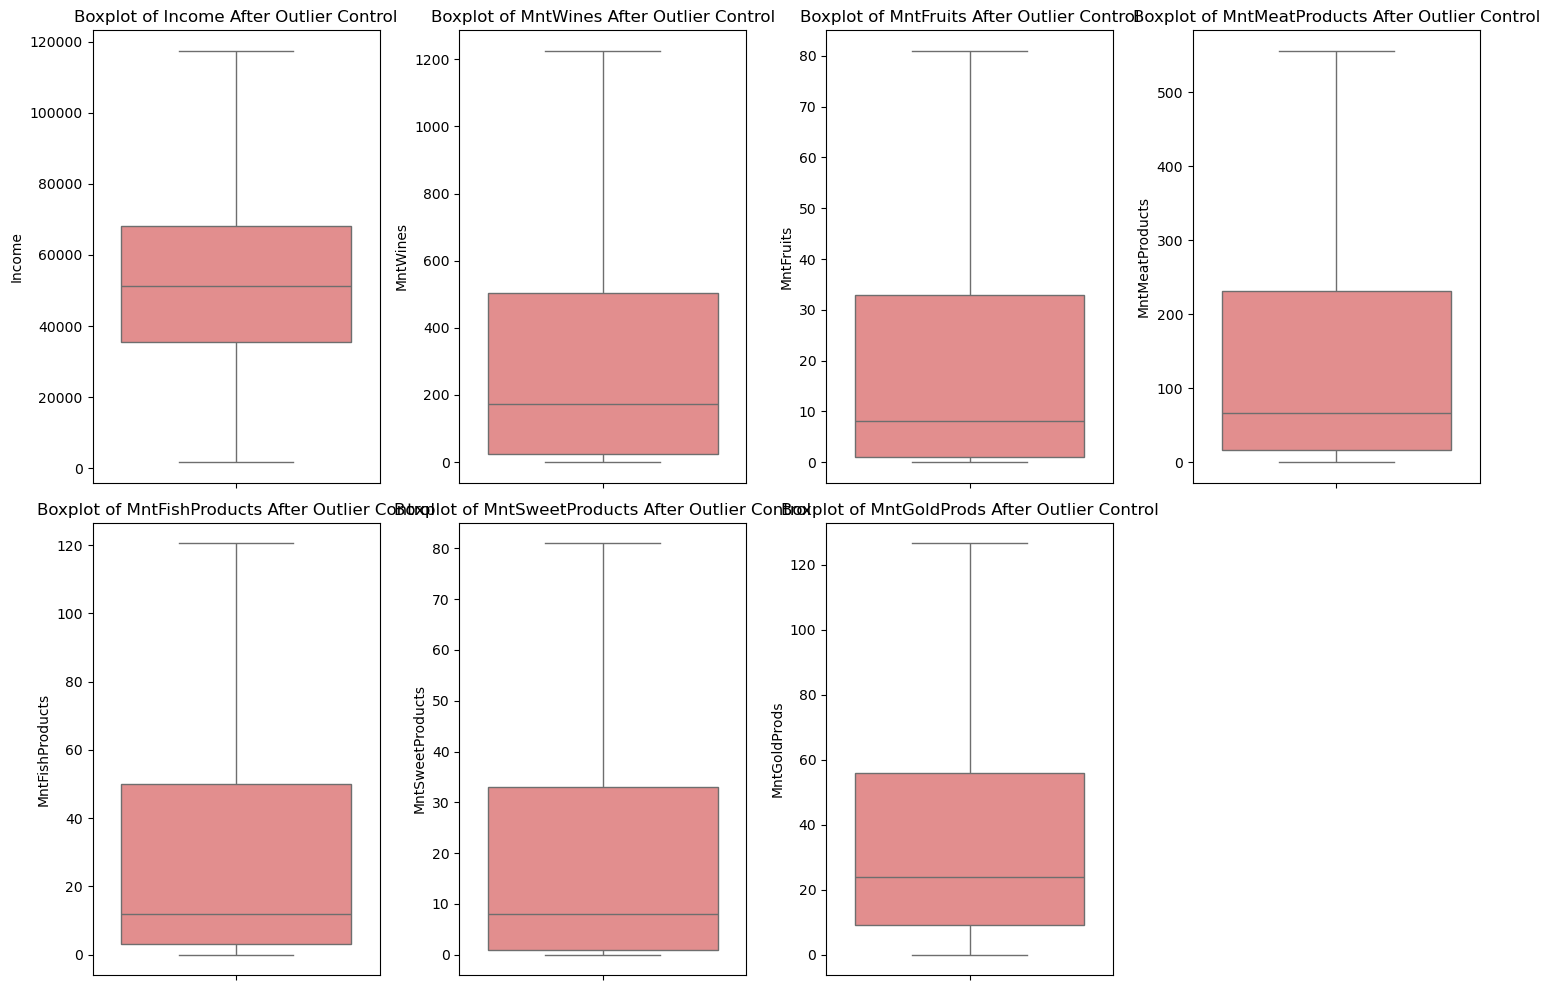

In [39]:
# Recheck outliers with boxplot after handling
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data[column], color='lightcoral')
    plt.title(f'Boxplot of {column} After Outlier Control')
plt.tight_layout()
plt.show()

# Display Cleaned Data

Reviewing the cleaned dataset helps verify the effectiveness of the data cleaning processes implemented.

In [40]:
# Display cleaned data after outlier control
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,...,5,0,0,0,0,0,0,3,11,0


# Data Analysis

In this section, you analyze total spending by product categories and examine spending patterns across different demographics. This helps identify high-value segments for targeted marketing.

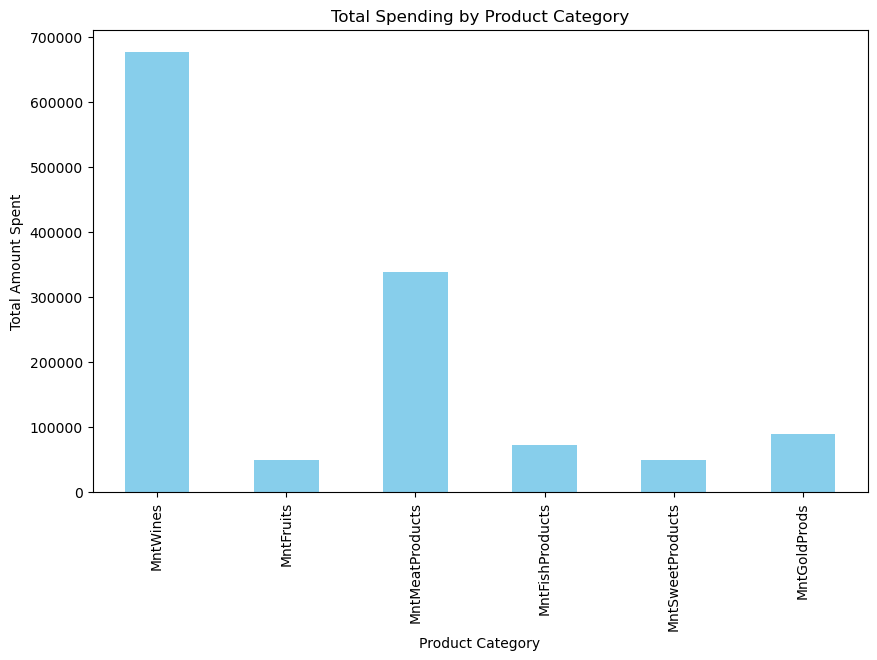

In [41]:
# Calculate total spending across all categories
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Visualize total spending across product categories
category_spending = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(10,6))
category_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.show()


## Spending Analysis by Demographic Groups



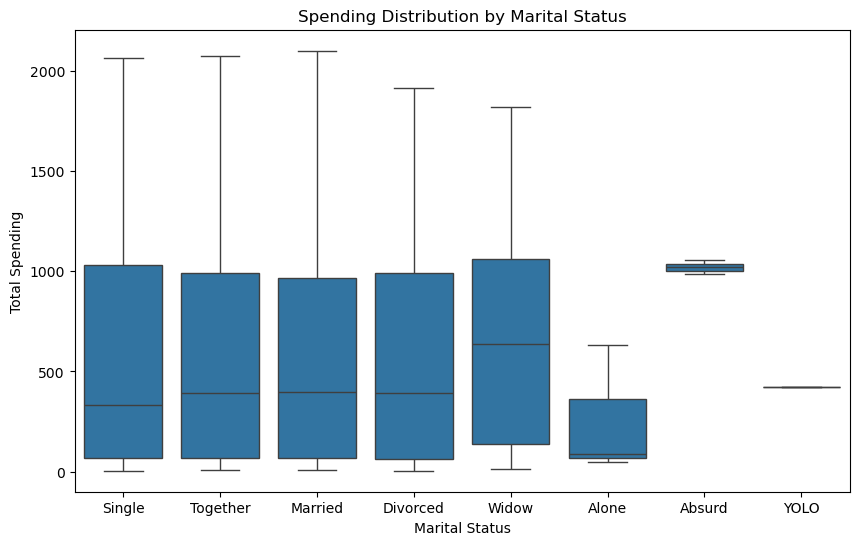

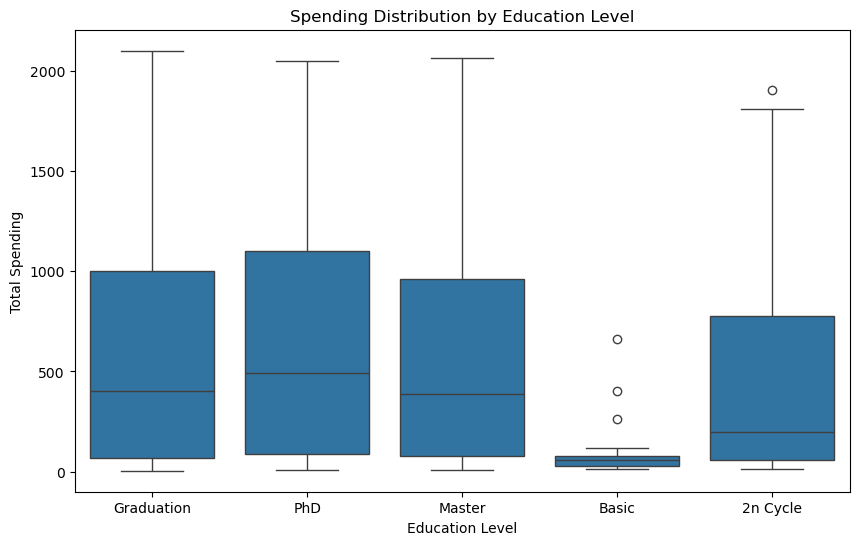

In [42]:
# Spending by Marital Status
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Marital_Status', y='Total_Spending')
plt.title('Spending Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

# Spending by Education Level
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Education', y='Total_Spending')
plt.title('Spending Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()


# Customer Response to Marketing Campaigns

Analyzing customer responses to marketing campaigns provides insight into the effectiveness of these efforts, helping inform future strategies.

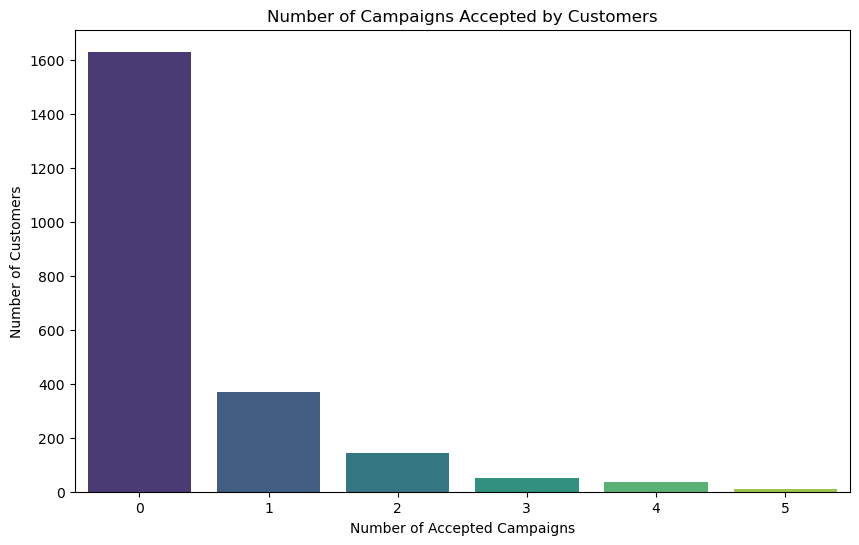

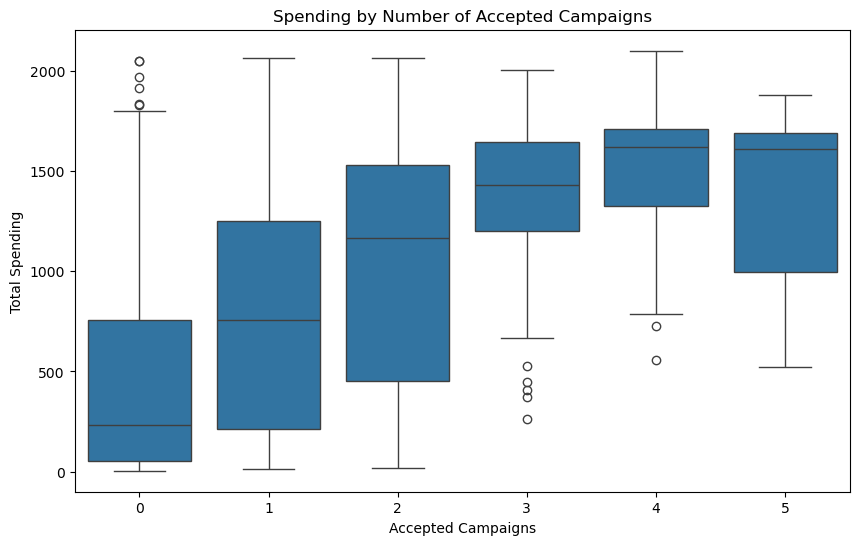

In [44]:
# Calculate the total number of accepted campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
data['Total_Accepted_Campaigns'] = data[campaign_columns].sum(axis=1)

# Plot distribution of accepted campaigns
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Total_Accepted_Campaigns', palette='viridis')
plt.title('Number of Campaigns Accepted by Customers')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.show()

# Spending by number of accepted campaigns
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Total_Accepted_Campaigns', y='Total_Spending')
plt.title('Spending by Number of Accepted Campaigns')
plt.xlabel('Accepted Campaigns')
plt.ylabel('Total Spending')
plt.show()


# Purchase Channel Analysis

Examining the purchase channels (web, catalog, store) allows the company to identify which channels are performing well and which require improvement.


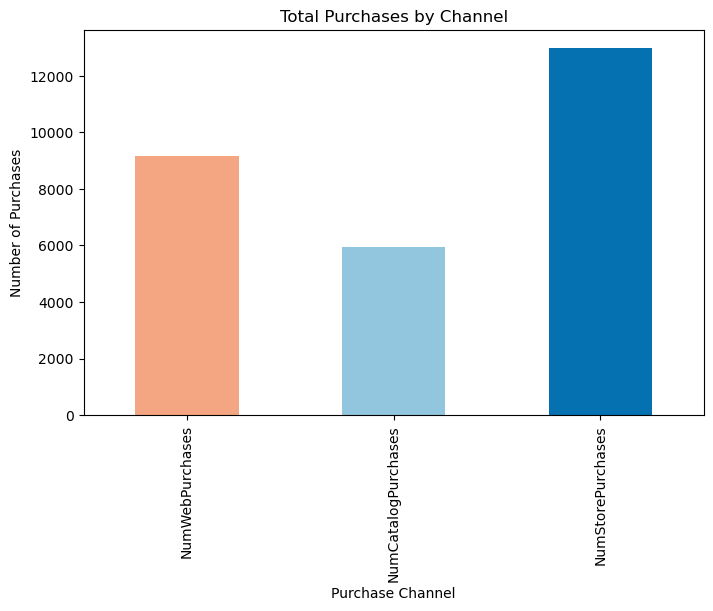

In [45]:
# Visualize purchases by channel (web, catalog, store)
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data[purchase_channels].sum().plot(kind='bar', color=['#f4a582', '#92c5de', '#0571b0'], figsize=(8,5))
plt.title('Total Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Number of Purchases')
plt.show()


# Conclusions and Recommendations

## Conclusions:
- Wine have the highest spending, followed by Meat products. Targeted promotions on these categories may have the biggest impact.
- Married customers tend to have higher spending, so family-oriented promotions may be effective.
- Customers who accept marketing campaigns generally spend more, indicating the effectiveness of such campaigns.
- Web purchases are lower than store purchases, suggesting room for growth in online sales.

## Recommendations:
- Increase promotions on high-spending categories like wine and meat products.
- Focus targeting campaigns towards married and family-oriented customers.
- Maintain and optimize marketing campaigns to drive purchases.
- Improve the online shopping experience to boost sales through web channels